In [35]:
def binarize(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 1 if x == 1 else 0)
    return df

In [36]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

In [37]:
def remove_low_frequency_outliers(df, column_name, min_frequency=0.01):
    value_counts = df[column_name].value_counts()
    proportions = value_counts / len(df)
    
    valid_values = proportions[proportions >= min_frequency].index
    
    df_cleaned = df[df[column_name].isin(valid_values)]
    
    return df_cleaned

In [38]:
def remove_outliers_by_threshold(df, column_name, threshold):
    df_cleaned = df[df[column_name] <= threshold]
    
    return df_cleaned

In [39]:
# 변수 이진화 함수
def binarize(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 1 if x == 1 else 0)
    return df

# IQR 제거 방식
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

# 빈도수 기반 필터링 함수
def remove_low_frequency_outliers(df, column_name, min_frequency=0.01):
    value_counts = df[column_name].value_counts()
    proportions = value_counts / len(df)
    
    valid_values = proportions[proportions >= min_frequency].index
    
    df_cleaned = df[df[column_name].isin(valid_values)]
    
    return df_cleaned

def remove_outliers_by_threshold(df, column_name, threshold):
    df_cleaned = df[df[column_name] <= threshold]
    
    return df_cleaned


# order_item_id 1개는 1로, 2개 이상은 0으로 이진화하는 코드
merged_df_cleaned = binarize(merge_df, 'order_item_id')

# price, shipping_charges, payment_value IQR 방법으로 처리
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'price')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'shipping_charges')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'payment_value')

# payment_installments 12개월 초과는 필터링
merged_df_cleaned = remove_outliers_by_threshold(merged_df_cleaned, 'payment_installments', 12)

# product_weight_g, product_length_cm, product_height_cm, product_width_cm IQR 방법으로 처리
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_weight_g')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_length_cm')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_height_cm')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_width_cm')

In [45]:
# 수치형 변수 로그변환 함수

def log_transform(df, cols):
    df_log_transformed = df[cols].apply(lambda x: np.log1p(x))
    
    return df_log_transformed

def normalize(df, cols):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols, index=df.index)
    
    return df_normalized

# 로그 변환
log_transformed_df = log_transform(merged_df_cleaned, numerical_cols)

# 정규화 수행
normalized_df = normalize(log_transformed_df, numerical_cols)

# 결과를 원래 데이터프레임에 반영
merged_df_cleaned[numerical_cols] = normalized_df

In [50]:
# product_category_name 종류별로 묶어서 카테고리 줄이기

category_mapping = {
    '가구/인테리어': [
        'furniture_decor', 'furniture_living_room', 'furniture_bedroom', 
        'furniture_mattress_and_upholstery', 'kitchen_dining_laundry_garden_furniture', 
        'la_cuisine', 'flowers', 'cool_stuff', 'perfumery', 'party_supplies', 
        'bed_bath_table', 'market_place', 'home_construction', 'christmas_supplies'
    ],
    '패션': [
        'fashion_underwear_beach', 'fashion_bags_accessories', 'fashion_shoes', 
        'fashion_male_clothing', 'fashion_sport', 'fashion_childrens_clothes', 
        'fashio_female_clothing', 'housewares', 'watches_gifts'
    ],
    '전자제품': [
        'telephony', 'computers_accessories', 'audio', 'tablets_printing_image', 
        'cine_photo', 'musical_instruments', 'consoles_games', 'dvds_blu_ray', 
        'music', 'electronics', 'air_conditioning', 'small_appliances', 
        'home_appliances', 'home_appliances_2', 'small_appliances_home_oven_and_coffee', 
        'home_comfort_2', 'signaling_and_security', 'security_and_services', 
        'fixed_telephony'
    ],
    '건설/공구': [
        'construction_tools_construction', 'costruction_tools_garden', 
        'construction_tools_safety', 'construction_tools_lights', 
        'costruction_tools_tools', 'garden_tools'
    ],
    '생활용품': [
        'baby', 'diapers_and_hygiene', 'health_beauty', 'home_confort', 
        'luggage_accessories', 'auto', 'food', 'drinks', 'food_drink', 
        'sports_leisure', 'pet_shop', 'agro_industry_and_commerce'
    ],
    '문구/사무용품': [
        'stationery', 'office_furniture', 'books_technical', 
        'books_general_interest', 'books_imported', 'arts_and_craftmanship', 
        'art', 'industry_commerce_and_business'
    ],
    '장난감': ['toys']
}

# 카테고리 매핑을 수행하는 함수
def map_category(category_name):
    for main_category, subcategories in category_mapping.items():
        if category_name in subcategories:
            return main_category
    return '기타'  

# `product_category_name` 컬럼을 매핑하여 새로운 컬럼 추가
merged_df_cleaned['product_category_group'] = merged_df_cleaned['product_category_name'].apply(map_category)

# 'product_category_name' 컬럼 삭제
merged_df_cleaned = merged_df_cleaned.drop(columns='product_category_name')

merged_df_cleaned['product_category_group'].value_counts()

product_category_group
장난감        58189
생활용품        6108
가구/인테리어     4968
전자제품        4164
패션          2730
건설/공구       1107
문구/사무용품      605
Name: count, dtype: int64

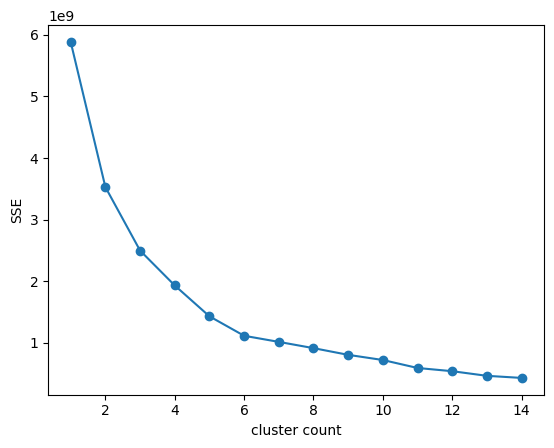

In [66]:
def elbow(df):
    sse = []
    for i in range(1,15):
        km = KMeans(n_clusters= i, init='k-means++', random_state=42)
        km.fit(df)
        sse.append(km.inertia_)
    
    plt.plot(range(1,15), sse, marker = 'o')
    plt.xlabel('cluster count')
    plt.ylabel('SSE')
    plt.show()

elbow(cluster_1)

In [72]:
# 원본 자료는 살리기 위해 복사하기
merged_clu_df = merged_df_cleaned.copy()

# 클러스트 항목 설정
cluster_1 = merged_df_cleaned[['repeat_order','total_price', 'avg_price', 'total_payment_value', 'avg_payment_value']]

# 학습하기
# 군집 3개로 나누기
custoemr_kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
custoemr_kmeans3.fit(cluster_1)

# 군집된 결과 저장
merged_clu_df['cluster'] = custoemr_kmeans3.labels_


# 컬럼 지우는 함수
def del_cols(df):
    del df['order_id']
    del df['customer_id']
    del df['seller_id']
    del df['product_id']
    del df['order_approved_at']
    del df['order_delivered_timestamp']
    del df['order_estimated_delivery_date']
    
# 군집 특성 확인하는 함수
def character_visual(df):
    plt.figure(figsize=(20,20))

    for i in range(len(df.columns)):
    
        cols = list(df.columns)[i]
    
        plt.subplot(4,6,i+1)
        sns.histplot(df, x=cols, palette='RdYlGn')
        plt.title(cols)
        